# Задание 1

In [3]:
import math


def f(x):
    return x - 2 * math.exp(-x)


def iteration_error(e, x, f):
    print("Iteration error: accuracy {} not achieved in 100 iterations\n"
          "Current value x = {}\n"
          "Value f(x) = {}".format(e, x, f(x)))
    return 


def calculate_by_bisection_method(f, a, b, e=0.001):
    if f(a) * f(b) > 0:
        return -1

    length = b - a
    centre = a + length / 2

    for i in range(100):
        length /= 2
        centre = a + length

        if abs(f(centre)) > e:
            if f(a) * f(centre) < 0:
                b = centre
            else:
                a = centre
        else:
            return centre

    iteration_error(e, centre, f(centre))
    return centre


def calculate_by_chord_method(f, a, b, e=0.001):
    if f(a) * f(b) > 0:
        return -1
    
    x = a
    help_var = a
    der2 = lambda arg: (-2) * math.exp(1) ** (-arg)

    if f(b) * der2(b) > 0:
        x = a
        help_var = b
    elif f(a) * der2(a) > 0:
        x = b
        help_var = a

    for i in range(100):
        x = x - f(x) / (f(help_var) - f(x)) * (help_var - x)

        if abs(f(x)) < e:
            return x

    iteration_error(e, x, f(x))
    return x


def calculate_by_newtons_method(f, x, e=0.001):
    der1 = lambda arg: 1 + 2 * math.exp(-arg)

    for i in range(100):
        x = x - f(x) / der1(x)
        
        if abs(f(x)) < e:
            return x

    iteration_error(e, x, f(x))
    return x


def calculate_by_steffensen_method(f, x, e=0.001):
    for i in range(100):
        x = x - f(x) ** 2 / (f(x + f(x)) - f(x))
        
        if abs(f(x)) < e:
            return x

    iteration_error(e, x, f(x))
    return x


def main():
    print("Bisection method:")
    x = calculate_by_bisection_method(f, 0, 1)
    print(x)
    print(f(x))

    print("\nChord method:")
    x = calculate_by_chord_method(f, 0, 1)
    print(x)
    print(f(x))

    print("\nNewton's method:")
    x = calculate_by_newtons_method(f, 1)
    print(x)
    print(f(x))

    print("\nSteffensen method:")
    x = calculate_by_steffensen_method(f, 1, 10 ** (-6))
    print(x)
    print(f(x))
    

if __name__ == "__main__":
    main()

Bisection method:
0.8525390625
-0.00012308809051009284

Chord method:
0.8528899948411474
0.0005270184773255027

Newton's method:
0.8526001078009586
-9.993360655324857e-06

Steffensen method:
0.8526054936037544
-1.558035878090891e-08


### Код в Octave

#### Файл SteffensenRoot.m

In [ ]:
function [Xs]=SteffensenRoot(Fun, Xest)
  Xs = Xest
  for i = 0: 100
    Xs = Xs - Fun(Xs) ^ 2 / (Fun(Xs + Fun(Xs)) - Fun(Xs))
    if (abs(Fun(Xs)) < 10 ^ -6)
      return
    endif
  endfor
  printf("Iteration error: accuracy 10^-6 not achieved in 100 iterations\nCurrent value x = %f\nValue f(x) = %f", x, y)
  return   
endfunction

### Результат
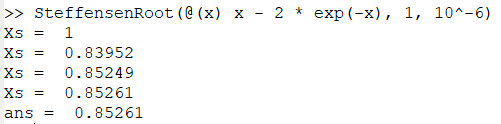

# Задание 2

x = g(x) - метод фиксированной точки, причем |g'(x)| < 1.
Система нелинейных уравнений:
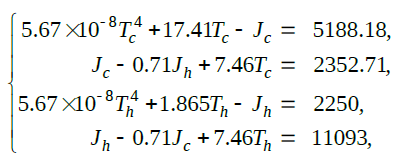

Итерационные функции:
Производные первых двух функций действительно по модулю меньше 1, что дает возможность использовать метод фиксированной точки для решения СНАУ.

Fixed-point method:
Tc = 481.02725469900474
Th = 671.1239779386549
Jc = 6222.2250824538205
Jh = 10504.194933130064


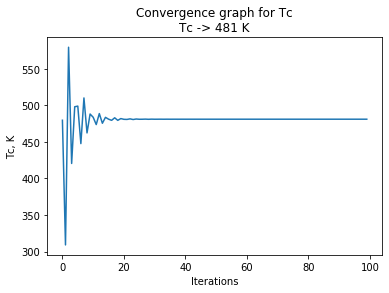

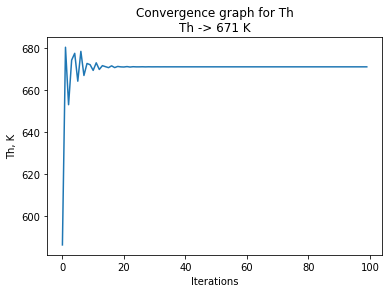

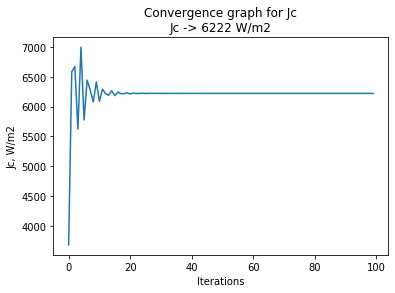

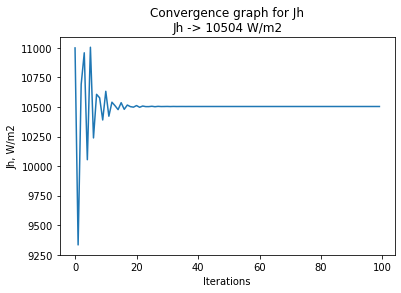

In [13]:
import matplotlib.pyplot as plt


def calculate_by_fixed_point_method(th, tc, jc, jh):
    tc_arr = []
    th_arr = []
    jc_arr = []
    jh_arr = []

    tc_k = tc
    th_k = th
    jc_k = jc
    jh_k = jh

    for i in range(100):
        tc_k = (jc - 17.41 * tc + 5188.18) ** (1 / 4) / (5.67 * 10 ** (-8)) ** (1 / 4)
        th_k = (jh - 1.865 * th + 2250) ** (1 / 4) / (5.67 * 10 ** (-8)) ** (1 / 4)
        jc_k = 0.71 * jh - 7.46 * tc + 2352.71
        jh_k = 0.71 * jc - 7.46 * th + 11093
        
        tc_arr.append(tc_k)
        th_arr.append(th_k)
        jc_arr.append(jc_k)
        jh_arr.append(jh_k)

        tc = tc_k
        th = th_k
        jc = jc_k
        jh = jh_k
        
    print("Tc = {}\nTh = {}\nJc = {}\nJh = {}".format(tc_k, th_k, jc_k, jh_k))
        
    plt.plot(tc_arr)   
    plt.title("Convergence graph for Tc\nTc -> 481 K")
    plt.xlabel("Iterations")
    plt.ylabel("Tc, K")
    plt.show()
    
    plt.plot(th_arr)
    plt.title("Convergence graph for Th\nTh -> 671 K")
    plt.xlabel("Iterations")
    plt.ylabel("Th, K")
    plt.show()
    
    plt.plot(jc_arr)   
    plt.title("Convergence graph for Jc\nJc -> 6222 W/m2")
    plt.xlabel("Iterations")
    plt.ylabel("Jc, W/m2")
    plt.show()
    
    plt.plot(jh_arr)
    plt.title("Convergence graph for Jh\nJh -> 10504 W/m2")
    plt.xlabel("Iterations")
    plt.ylabel("Jh, W/m2")
    plt.show()
    
    return


def main():
    print("Fixed-point method:")
    calculate_by_fixed_point_method(298, 298, 3000, 5000)


if __name__ == "__main__":
    main()

# Задание 3

Задача.
Камень брошен вертикально вверх. Определить через сколько секунд он достигнет высоты 60 метров, если начальная скорость камня была 40 м/с. Ускорение свободного падения взять приближенно равным 10 м/с^2. Сопротивлением воздуха пренебречь.

My own method in physical task:


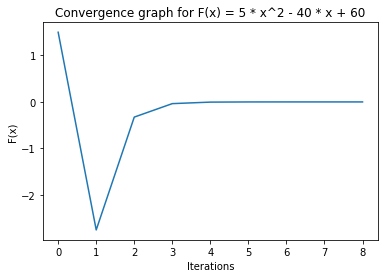

x = 2.000000030974097
f(x) = -6.194819306415411e-07


In [5]:
import matplotlib.pyplot as plt


def physical_f(t):
    return 5 * t ** 2 - 40 * t + 60


def iteration_error(e, x, f):
    print("Iteration error: accuracy {} not achieved in 100 iterations\n"
          "Current value x = {}\n"
          "Value f(x) = {}".format(e, x, f(x)))
    return 


def calculate_by_my_own_method(f, a, b, e=0.001):
    if f(a) * f(b) > 0:
        return -1
    
    x_arr = []

    # First time by bisection method
    length = (b - a) / 2
    centre = a + length
    
    if f(a) * f(centre) < 0:
        b = centre
    else:
        a = centre
    x = centre
    x_arr.append(x)

    for i in range(100):
        # Bisection method
        length /= 2
        centre = a + length

        # Regula Falsi method
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))

        # Whose approximation is better
        if abs(e - abs(f(centre))) < abs(e - abs(f(c))):
            x = centre
        else:
            x = c
            
        x_arr.append(f(x))

        if abs(f(x)) < e:
            plt.plot(x_arr)   
            plt.title("Convergence graph for F(x) = 5 * x^2 - 40 * x + 60")
            plt.xlabel("Iterations")
            plt.ylabel("F(x)")
            plt.show()
            return x
        elif f(a) * f(x) < 0:
            b = x
        else:
            a = x

    iteration_error(e, x, f(x))
    return x


def main():
    print("My own method in physical task:")
    x = calculate_by_my_own_method(physical_f, 0, 3, 10 ** (-6))
    print("x = {}".format(x))
    print("f(x) = {}".format(physical_f(x)))


if __name__ == "__main__":
    main()

### Код в Octave

#### Файл BiRegRoot.m

In [ ]:
function Xs=BiRegRoot(Fun, a, b, ErrMax)
    if (Fun(a) * Fun(b)) > 0
      return
    endif
    
    e_prev = (a + b) / 2

    # First time by bisection method
    length = (b - a) / 2
    centre = a + length
    if (Fun(a) * Fun(centre) < 0)
        b = centre
    else
        a = centre
    endif
    Xs = centre
    x_arr(1) = Xs
    e_cur = (a + b) / 2
    
    for i = 0 : 100
        # Bisection method
        length /= 2
        centre = a + length

        # Regula Falsi method
        c = (a * Fun(b) - b * Fun(a)) / (Fun(b) - Fun(a))

        ErrMax = abs((e_cur - e_prev) / e_prev)
        # Whose approximation is better
        if (abs(ErrMax - abs(Fun(centre))) < abs(ErrMax - abs(Fun(c))))
            Xs = centre
        else
            Xs = c
        end
        
        x_arr(i + 2) = Xs

        if (abs(Fun(Xs)) < ErrMax)
            y_arr = Fun(x_arr)
            plot(0:1:i+1, y_arr)
            return
        elseif (Fun(a) * Fun(Xs) < 0)
            b = Xs
        else
            a = Xs
            
        end
        e_prev = e_cur
        e_cur = (a + b) / 2
    endfor  

    printf("Iteration error: accuracy 10^-3 not achieved in 100 iterations\nCurrent value x = %f\nValue f(x) = %f", Xs, y)
endfunction

#### Результат использования в Octave


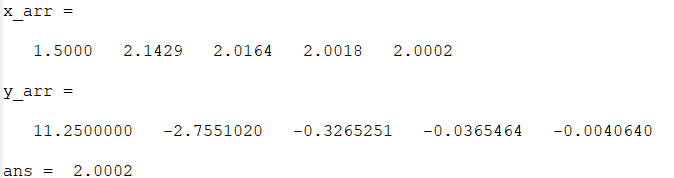

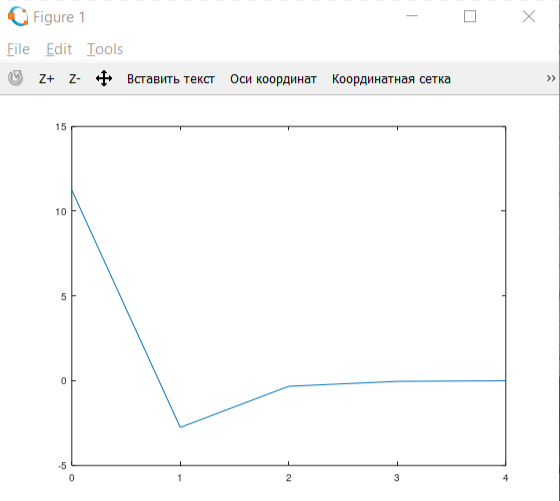

Проверка правильности расчётов со встроенной функцией fzero
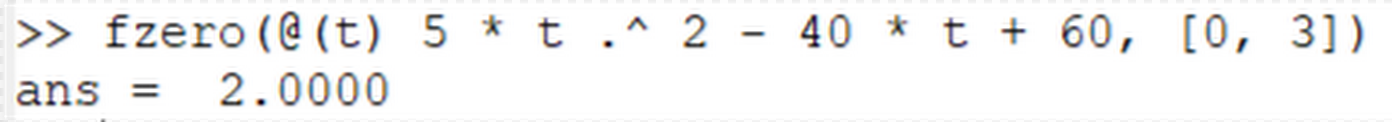

# Задание 4

In [6]:
def f(x):
    return 2 * x ** 3 - 4 * x ** 2 - 4 * x - 20


def iteration_error(e, x, f):
    print("Iteration error: accuracy {} not achieved in 100 iterations\n"
          "Current value x = {}\n"
          "Value f(x) = {}".format(e, x, f(x)))
    return 


def calculate_by_newtons_method(f, x, e=0.001):
    der1 = lambda arg: 6 * x ** 2 - 8 * x - 4

    for i in range(100):
        x = x - f(x) / der1(x)
        
        if abs(f(x)) < e:
            return x

    iteration_error(e, x, f(x))
    return x


def main():    
    print("\nNewton's method:")
    x = calculate_by_newtons_method(f, 3)
    print(x)
    print(f(x))
    

if __name__ == "__main__":
    main()


Newton's method:
3.4318561345728207
0.00033768964028979553


# Задание 5

In [11]:
def f(x):
    return math.exp(x) * x ** 3 - 2


def iteration_error(e, x, f):
    print("Iteration error: accuracy {} not achieved in 100 iterations\n"
          "Current value x = {}\n"
          "Value f(x) = {}".format(e, x, f(x)))
    return 


def calculate_by_simple_iteration_method(f, x, e=0.001):
    der1 = lambda arg: math.exp(arg) + 3 * arg ** 2
    const = 1 / der1(x)

    for i in range(100):
        x = x - const * f(x)

        if abs(f(x)) < e:
            return x

    iteration_error(e, x, f(x))
    return x


def calculate_by_newtons_method(f, x, e=0.001):
    der1 = lambda arg: math.exp(arg) + 3 * arg ** 2

    for i in range(100):
        x = x - f(x) / der1(x)
        
        if abs(f(x)) < e:
            return x

    iteration_error(e, x, f(x))
    return x


def main():
    x1 = calculate_by_newtons_method(f, 1, 10 ** (-14))
    y1 = f(x1)

    x2 = calculate_by_simple_iteration_method(f, 1, 10 ** (-14))
    y2 = f(x2)

    # Mega table
    print("{:18} {:^20} {:^25}".format("Method name", "x", "y"))
    print("{:18} {:20} {:25}".format("Newton's method", x1, y1))
    print("{:18} {:20} {:25}".format("Simple iteration", x2, y2))

    with open("Task_5.txt", "w") as file:
        file.write("{:18} {:^20} {:^25}\n".format("Method name", "x", "y"))
        file.write("{:18} {:20} {:25}\n".format("Newton's method", x1, y1))
        file.write("{:18} {:20} {:25}\n".format("Simple iteration", x2, y2))
    

if __name__ == "__main__":
    main()

Method name                 x                       y            
Newton's method      0.9254789277509078    -6.661338147750939e-15
Simple iteration     0.9254789277509096     8.881784197001252e-15


# Задание 6

In [12]:
import numpy
import math


def f61(x, y):
    return math.sin(x + y) - 1.5 * x + 1


def f62(x, y):
    return x ** 2 + y ** 2 - 1


def calculate_system_by_newtons_method(f1, f2, x, y, e=0.001):
    der1_x = lambda arg1, arg2: math.cos(arg1 + arg2) - 1.5
    der1_y = lambda arg1, arg2: math.cos(arg1 + arg2)

    der2_x = lambda arg1: 2 * arg1
    der2_y = lambda arg2: 2 * arg2

    for i in range(500):
        a = numpy.array([[der1_x(x, y), der2_x(x)], [der1_y(x, y), der2_y(y)]])
        b = numpy.array([(-1) * f1(x, y), (-1) * f2(x, y)])
        answer = numpy.linalg.solve(a, b)
        gn = answer[0]
        hn = answer[1]
        xn = x + gn
        yn = y + hn

        if abs(xn - x) < e and abs(yn - y) < e:
            return [xn, yn]
        else:
            x = xn
            y = yn

    print("Iteration error!")
    return [x, y]


def main():
    print("\nNewton's method for solving systems of nonlinear equations\n")

    answer1 = list(calculate_system_by_newtons_method(f61, f62, 0.2, -0.95, 10 ** (-14)))
    answer2 = list(calculate_system_by_newtons_method(f61, f62, 0.8, -0.6, 10 ** (-14)))

    # Mega table 2
    print("{:12} {:^20} {:^20} {:^25} {:^25}".format("Root number", "x", "y", "f1(x, y)", "f2(x, y)"))
    print("{:12} {:20} {:20} {:25} {:25}".format("1", answer1[0], answer1[1],
                                                 f61(answer1[0], answer1[1]), f62(answer1[0], answer1[1])))
    print("{:12} {:20} {:20} {:25} {:25}".format("2", answer2[0], answer2[1],
                                                 f61(answer2[0], answer2[1]), f62(answer2[0], answer2[1])))

    with open("Task_6.txt", "w") as file:
        file.write("{:12} {:^20} {:^20} {:^25} {:^25}\n".format("Root number", "x", "y", "f1(x, y)", "f2(x, y)"))
        file.write("{:12} {:20} {:20} {:25} {:25}\n".format("1", answer1[0], answer1[1],
                                                            f61(answer1[0], answer1[1]), f62(answer1[0], answer1[1])))
        file.write("{:12} {:20} {:20} {:25} {:25}\n".format("2", answer2[0], answer2[1],
                                                            f61(answer2[0], answer2[1]), f62(answer2[0], answer2[1])))
        
if __name__ == "__main__":
    main()


Newton's method for solving systems of nonlinear equations

Root number           x                    y                   f1(x, y)                  f2(x, y)         
1             0.19516374192485264   -0.980770673418557     4.440892098500626e-16     2.220446049250313e-16
2              0.8016849485790111  -0.5977468052795215   -1.3322676295501878e-15     5.773159728050814e-15
